<a href="https://colab.research.google.com/github/sls3542/Project2/blob/main/Project2Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/Intermediate Machine Learning/salaries.csv"
df = pd.read_csv(path)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Marketing Data Analyst,200000,USD,200000,GB,100,GB,S
1,2022,EN,FT,Data Scientist,96000,CAD,74378,CA,100,CA,L
2,2022,SE,FT,Data Science Lead,165000,USD,165000,US,50,US,S
3,2022,EN,FT,Data Scientist,27000,GBP,33599,GB,50,GB,L
4,2022,SE,FT,Data Engineer,185900,USD,185900,US,0,US,M


In [4]:
df.shape

(1195, 11)

Upon review of this dataset, all columns are relevant to the predictions. 

In [5]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are no missing values in the data

In [6]:
df['work_year'].value_counts()

2022    893
2021    227
2020     75
Name: work_year, dtype: int64

No erroneous data here.

In [7]:
df['experience_level'].value_counts()

SE    702
MI    314
EN    138
EX     41
Name: experience_level, dtype: int64

looks good!

In [8]:
df['employment_type'].value_counts()

FT    1170
PT      12
CT       8
FL       5
Name: employment_type, dtype: int64

Also looks good

In [9]:
df['job_title'].value_counts()

Data Scientist               310
Data Engineer                276
Data Analyst                 162
Machine Learning Engineer     78
Analytics Engineer            37
                            ... 
Power BI Developer             1
Data Science Lead              1
Big Data Architect             1
Staff Data Scientist           1
Finance Data Analyst           1
Name: job_title, Length: 63, dtype: int64

This will be an interesting one to one hot encode. I might seperate the data nad run the three top job titles seperately to see the figures. But still looking very clean

In [10]:
df['salary_currency'].value_counts()

USD    892
EUR    129
GBP     76
INR     40
CAD     21
AUD      8
BRL      5
PLN      3
TRY      3
JPY      3
SGD      3
DKK      3
CNY      2
HUF      2
MXN      2
CHF      1
CZK      1
CLP      1
Name: salary_currency, dtype: int64

Looks clean as well, also another vector to see if there is a correlation between salary level and currency.

In [11]:
df['employee_residence'].value_counts()

US    795
GB     78
IN     45
CA     36
DE     31
     ... 
IE      1
TH      1
ID      1
EG      1
MT      1
Name: employee_residence, Length: 64, dtype: int64

looks clean

In [12]:
df['remote_ratio'].value_counts()

100    730
0      330
50     135
Name: remote_ratio, dtype: int64

In [13]:
df['company_location'].value_counts()

US    823
GB     82
CA     37
IN     36
DE     35
ES     24
FR     19
GR     13
PT      9
AU      9
NL      9
JP      6
BR      6
AT      5
TR      5
PR      4
PL      4
BE      4
DK      4
MX      3
CZ      3
SG      3
NG      3
PK      3
LU      3
AE      3
RU      2
CH      2
SI      2
CN      2
IT      2
AS      2
ID      2
UA      1
IL      1
HR      1
VN      1
MD      1
CL      1
IR      1
NZ      1
CO      1
KE      1
HU      1
FI      1
EG      1
IE      1
IQ      1
RO      1
DZ      1
TH      1
BO      1
PH      1
HN      1
AL      1
EE      1
MY      1
AR      1
MT      1
Name: company_location, dtype: int64

This follows the ISO Country Codes. Will be interesting to convert to numbers. I wonder if there is a standardized system for machine learning.

In [14]:
df['company_size'].value_counts()

M    774
L    310
S    111
Name: company_size, dtype: int64

Also looks clean!

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

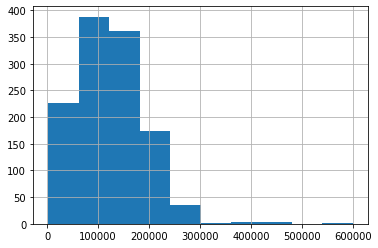

In [16]:
df['salary_in_usd'].hist();

Wow thats already pretty cool. Shows that people working with AI and Machine Learning mostly make arround 100k

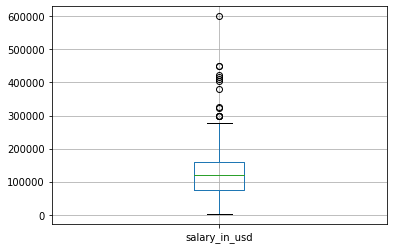

In [17]:
df.boxplot('salary_in_usd');

Good to see that there are no low outliers lol.

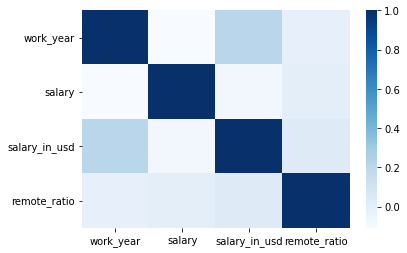

In [18]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues')

The only correlation of note is the salary in USD to work year. It has the highest correlation. Regular salary can be ignored as it is in several currencies.

In [19]:
paybyexp = df.groupby(['experience_level'])['salary_in_usd'].nunique()
paybyexp

experience_level
EN    106
EX     37
MI    207
SE    303
Name: salary_in_usd, dtype: int64

In [20]:
salaries = df.groupby('experience_level')['salary_in_usd'].mean()
salaries

experience_level
EN     58445.355072
EX    195607.414634
MI     90290.748408
SE    144448.015670
Name: salary_in_usd, dtype: float64

In [21]:
explevel = list(paybyexp.index)
explevel

['EN', 'EX', 'MI', 'SE']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Entry'),
 Text(0, 0, 'Middle'),
 Text(0, 0, 'Senior'),
 Text(0, 0, 'Executive')]

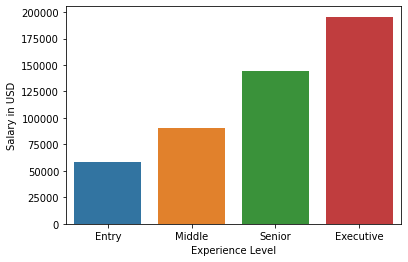

In [22]:
plt = sns.barplot(explevel, salaries, order=['EN','MI','SE','EX']);
plt.set(xlabel="Experience Level", ylabel='Salary in USD')
plt.set_xticklabels(['Entry','Middle','Senior','Executive'])

This graph shows the average salaries by experience level. Excutive level positions pay the most.

In [23]:
paybycur = df.groupby(['salary_currency'])['salary_in_usd'].nunique()
paybycur

salary_currency
AUD      7
BRL      5
CAD     20
CHF      1
CLP      1
CNY      2
CZK      1
DKK      3
EUR     89
GBP     42
HUF      2
INR     35
JPY      3
MXN      2
PLN      3
SGD      3
TRY      3
USD    316
Name: salary_in_usd, dtype: int64

In [24]:
currencyeqv = df.groupby('salary_currency')['salary_in_usd'].mean()
currencyeqv

salary_currency
AUD     75508.750000
BRL      9673.800000
CAD    100145.714286
CHF    120334.000000
CLP     40038.000000
CNY     39696.500000
CZK      5149.000000
DKK     31192.666667
EUR     64394.829457
GBP     82937.302632
HUF     35997.000000
INR     26438.050000
JPY     60921.333333
MXN     18185.000000
PLN     36268.666667
SGD     91182.333333
TRY     20096.666667
USD    141640.933857
Name: salary_in_usd, dtype: float64

In [25]:
currency = list(paybycur.index)
currency

['AUD',
 'BRL',
 'CAD',
 'CHF',
 'CLP',
 'CNY',
 'CZK',
 'DKK',
 'EUR',
 'GBP',
 'HUF',
 'INR',
 'JPY',
 'MXN',
 'PLN',
 'SGD',
 'TRY',
 'USD']

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Salary in USD'), Text(0.5, 0, 'Original Currency')]

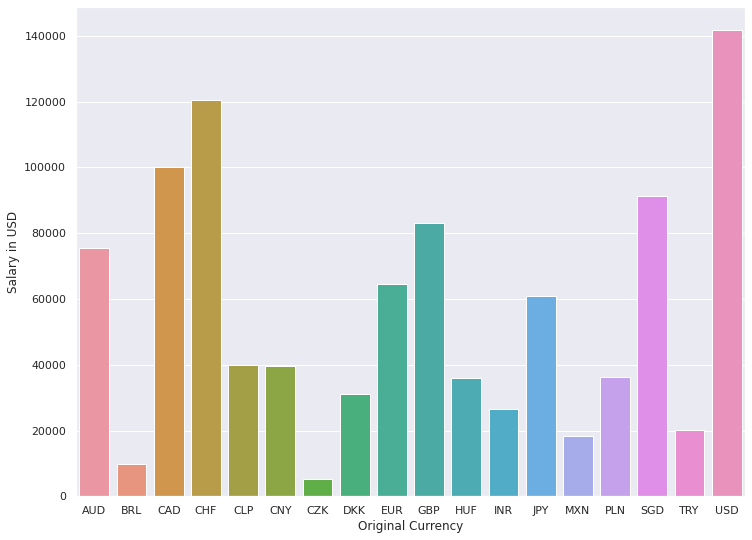

In [26]:
sns.set(rc={'figure.figsize':(12,9)})
ax = sns.barplot(currency, currencyeqv,)
ax.set(xlabel="Original Currency", ylabel='Salary in USD')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1195 non-null   int64 
 1   experience_level    1195 non-null   object
 2   employment_type     1195 non-null   object
 3   job_title           1195 non-null   object
 4   salary              1195 non-null   int64 
 5   salary_currency     1195 non-null   object
 6   salary_in_usd       1195 non-null   int64 
 7   employee_residence  1195 non-null   object
 8   remote_ratio        1195 non-null   int64 
 9   company_location    1195 non-null   object
 10  company_size        1195 non-null   object
dtypes: int64(4), object(7)
memory usage: 102.8+ KB


In [28]:
df.drop(columns = ['company_location','salary','employee_residence'])

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,remote_ratio,company_size
0,2022,SE,FT,Marketing Data Analyst,USD,200000,100,S
1,2022,EN,FT,Data Scientist,CAD,74378,100,L
2,2022,SE,FT,Data Science Lead,USD,165000,50,S
3,2022,EN,FT,Data Scientist,GBP,33599,50,L
4,2022,SE,FT,Data Engineer,USD,185900,0,M
...,...,...,...,...,...,...,...,...
1190,2020,SE,FT,Data Scientist,USD,412000,100,L
1191,2021,MI,FT,Principal Data Scientist,USD,151000,100,L
1192,2020,EN,FT,Data Scientist,USD,105000,100,S
1193,2020,EN,CT,Business Data Analyst,USD,100000,100,L


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1195 non-null   int64 
 1   experience_level    1195 non-null   object
 2   employment_type     1195 non-null   object
 3   job_title           1195 non-null   object
 4   salary              1195 non-null   int64 
 5   salary_currency     1195 non-null   object
 6   salary_in_usd       1195 non-null   int64 
 7   employee_residence  1195 non-null   object
 8   remote_ratio        1195 non-null   int64 
 9   company_location    1195 non-null   object
 10  company_size        1195 non-null   object
dtypes: int64(4), object(7)
memory usage: 102.8+ KB


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, \
precision_score, recall_score, accuracy_score, f1_score, ConfusionMatrixDisplay, \
classification_report

In [31]:
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state=42)

In [32]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

median_imputer = SimpleImputer(strategy='median')
missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')

cat_cols = make_column_selector(dtype_include='object')
num_cols = make_column_selector(dtype_include='number')

num_pipe = make_pipeline(median_imputer, scaler)
cat_pipe = make_pipeline(missing_imputer, ohe)

processor = make_column_transformer((num_pipe, num_cols), (cat_pipe, cat_cols))

Lets try linear regression and see how well it does on this dataset!

In [33]:
scores = pd.DataFrame()

linreg2 = LinearRegression()
lin_pipe2 = make_pipeline(processor, linreg2)
lin_pipe2.fit(X_train, y_train)

train_pred = lin_pipe2.predict(X_train)
test_pred = lin_pipe2.predict(X_test)

In [34]:
def eval_regression(true, pred, name='Model'):
  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['RMSE'] = [np.sqrt(mean_squared_error(true, pred))]
  scores['MAE'] = [mean_absolute_error(true, pred)]
  scores['R2'] = [r2_score(true, pred)]
  return scores

In [35]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

scores = pd.concat([train_scores, test_scores])
scores

,Model Name,RMSE,MAE,R2
0,Train,3.971450e+04,2.765232e+04,6.473207e-01
0,Test,1.020184e+15,2.256774e+14,-2.450045e+20


This is not a good fit so far. Lets try another model!

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf = RandomForestRegressor(random_state = 42)

In [38]:
rf = RandomForestRegressor(random_state = 42)
rfpipe = make_pipeline(processor, rf)
rfpipe.fit(X_train, y_train)

train_pred = rfpipe.predict(X_train)
test_pred = rfpipe.predict(X_test)

In [39]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

scores = pd.concat([train_scores, test_scores])
scores

,Model Name,RMSE,MAE,R2
0,Train,4253.304401,1109.767143,0.995955
0,Test,9677.108151,2780.193545,0.977955


ok thats much better. Lets see if we can tune some hyperparameters. Lets try changing the max_depth.

In [40]:
rf_7 = RandomForestRegressor(max_depth = 7, random_state = 42)
rfpipe = make_pipeline(processor, rf_7)
rfpipe.fit(X_train, y_train)
train_pred = rfpipe.predict(X_train)
test_pred = rfpipe.predict(X_test)


In [41]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

scores = pd.concat([train_scores, test_scores])
scores

,Model Name,RMSE,MAE,R2
0,Train,5303.509182,2256.744758,0.993711
0,Test,10242.425545,3648.638970,0.975304


Wow thats a slam dunk lets try another model!

In [47]:
from sklearn import linear_model

In [48]:

lasso = linear_model.Lasso()
laspipe = make_pipeline(processor, lasso)
laspipe.fit(X_train, y_train)

train_pred = laspipe.predict(X_train)
test_pred = laspipe.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.673e+10, tolerance: 4.007e+08
  model = cd_fast.enet_coordinate_descent(


In [49]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

scores = pd.concat([train_scores, test_scores])
scores

,Model Name,RMSE,MAE,R2
0,Train,39718.279933,27735.963937,0.647254
0,Test,51498.390089,36007.128512,0.375684


this is slightly better still! Taken from sci-kitlearn.org. This model is not as good as the last.

In [50]:
from sklearn.linear_model import Ridge

In [51]:
ridge = Ridge()
ridpipe = make_pipeline(processor, ridge)
ridpipe.fit(X_train, y_train)

train_pred = ridpipe.predict(X_train)
test_pred = ridpipe.predict(X_test)

In [52]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

scores = pd.concat([train_scores, test_scores])
scores

,Model Name,RMSE,MAE,R2
0,Train,41487.925191,29687.680545,0.615120
0,Test,45651.607043,32823.931581,0.509398


This is the best one yet lets see if we can tune it!

In [53]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

lets see if we can get the alpha to work

In [54]:
ridge = Ridge(alpha = 100)
ridpipe = make_pipeline(processor, ridge)
ridpipe.fit(X_train, y_train)

train_pred = ridpipe.predict(X_train)
test_pred = ridpipe.predict(X_test)

In [55]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

scores = pd.concat([train_scores, test_scores])
scores

,Model Name,RMSE,MAE,R2
0,Train,49534.569021,35090.406975,0.451346
0,Test,48712.120212,34976.814191,0.441413


ok slightly worse lets see if we can try again

In [56]:
ridge = Ridge(alpha = 6)
ridpipe = make_pipeline(processor, ridge)
ridpipe.fit(X_train, y_train)

train_pred = ridpipe.predict(X_train)
test_pred = ridpipe.predict(X_test)

In [57]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

scores = pd.concat([train_scores, test_scores])
scores

,Model Name,RMSE,MAE,R2
0,Train,44035.842940,31394.591918,0.566395
0,Test,45291.550466,32214.850437,0.517107


This looks like its the best we can do! Though it is not ideal given the small size of the dataset I think that this is works.

### Final Model

In light of all the work done on this project. It is clear that Random Forest Regressor is the best model for the job. Bellow again see the Random Forest Regressor in action!

In [63]:
rf = RandomForestRegressor(random_state = 42)
rfpipe = make_pipeline(processor, rf)
rfpipe.fit(X_train, y_train)

train_pred = rfpipe.predict(X_train)
test_pred = rfpipe.predict(X_test)

In [64]:
train_scores = eval_regression(y_train, train_pred, name='Train')

test_scores = eval_regression(y_test, test_pred, name='Test')

scores = pd.concat([train_scores, test_scores])
scores

,Model Name,RMSE,MAE,R2
0,Train,4253.304401,1109.767143,0.995955
0,Test,9677.108151,2780.193545,0.977955


Im proud of that R2 score. It appears that the model is working well and can predict salaries based off of job titles and work experience!